In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

# Solving Fixed Point Problems

In numerous applications, we encounter the task of solving equations of the form $$x = g(x)$$
for a continuous function $g$. In this exercise we will see one simple method to solve such problems: $$x_{t+1} = g(x_t)\,.$$
We will solve two equations of this form: $$x = log(1+x)$$ and $$x = log(2+x)\,.$$

## Plot $g$

Let us see how the two functions look over an interval $[0,2]$.

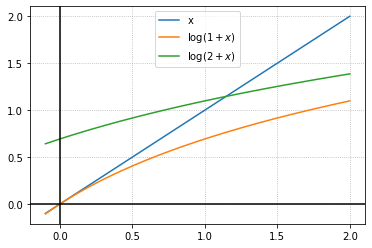

In [3]:
x = np.arange(-0.1, 2, 0.0001)
"""Compute the value of g(x)."""
# ***************************************************
# INSERT YOUR CODE HERE
# TODO: compute the values of log(1+x) and log(2+x)
# ***************************************************
y1 = np.log(1+x)
y2 = np.log(2+x)

"""Plot the computed values"""
fig = plt.figure()
plt.plot(x, x, label='x')
plt.plot(x, y1, label='$\log(1 + x)$')
plt.plot(x, y2, label='$\log(2 + x)$')
plt.grid(linestyle=':')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend()

## Compute Lipschitz Constant of $g$

Derive and plot the derivate of $\log(1+x)$ and $\log(2+x)$ over the interval $[0,2]$. What are the Lipschitz constants?

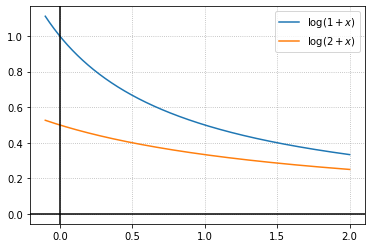

In [5]:
x = np.arange(0, 2, 0.0001)

"""Compute the derivative of g(x)."""
# ***************************************************
# INSERT YOUR CODE HERE
# TODO: compute the derivatives of log(1+x) and log(2+x)
# ***************************************************
y1 = 1/(1+x)
y2 = 1/(2+x)

"""Plot the computed values"""
fig = plt.figure()
plt.plot(x, y1, label='$\log(1 + x)$')
plt.plot(x, y2, label='$\log(2 + x)$')
plt.grid(linestyle=':')
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.legend()

The lipschitz constants are : 
- g1 -> B1 = 1 
- g2 -> B2 = 2

## Computing Fixed Point

Please fill in the functions `compute_gradient` below:

In [10]:
import math
def fixed_point(initial_x, max_iters, objective):
    """Compute the fixed point."""
    # Define parameters to store x and objective func. values
    xs = []
    errors = []
    x = initial_x
    step_size = 1.25/1*math.sqrt(max_iters)
    for n_iter in range(max_iters):
        # compute objective and error
        obj = objective(x)
        error = np.abs(x - obj)
        # store x and error
        xs.append(x)
        errors.append(error)
        
        # update x
        
        #gradient = 1/math.exp(obj) if x>=0 else  -1/math.exp(obj)
        #x = x - step_size * gradient 
        
        x = obj
        
        # print the current error
        if n_iter % 10 == 0: 
            print("Fixed point: iteration ={i}, x = {x:.2e}, error={err:.2e}".format(i=n_iter, x=x, err=error))
    return errors, xs

Test your implementation on the first function. Does it converge to 0?

In [17]:
# Define the parameters of the algorithm.
max_iters = 100

# Write the objective function
func = lambda x: np.log(1 + x)

# Initialization
initial_x = 2

# Run fixed point.
errors_func1, xs_func1 = fixed_point(initial_x, max_iters, func)


Fixed point: iteration =0, x = 1.10e+00, error=9.01e-01
Fixed point: iteration =10, x = 1.78e-01, error=1.68e-02
Fixed point: iteration =20, x = 9.51e-02, error=4.67e-03
Fixed point: iteration =30, x = 6.47e-02, error=2.14e-03
Fixed point: iteration =40, x = 4.90e-02, error=1.22e-03
Fixed point: iteration =50, x = 3.94e-02, error=7.87e-04
Fixed point: iteration =60, x = 3.30e-02, error=5.49e-04
Fixed point: iteration =70, x = 2.83e-02, error=4.05e-04
Fixed point: iteration =80, x = 2.48e-02, error=3.11e-04
Fixed point: iteration =90, x = 2.21e-02, error=2.46e-04


Run your implementation on the second function

In [18]:
# Define the parameters of the algorithm.
max_iters = 100

# Write the second objective function
func = lambda x: np.log(2 + x)

# Initialization
initial_x = 2

# Run fixed point.
errors_func2, xs_func2 = fixed_point(initial_x, max_iters, func)


Fixed point: iteration =0, x = 1.39e+00, error=6.14e-01
Fixed point: iteration =10, x = 1.15e+00, error=5.14e-06
Fixed point: iteration =20, x = 1.15e+00, error=5.41e-11
Fixed point: iteration =30, x = 1.15e+00, error=4.44e-16
Fixed point: iteration =40, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =50, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =60, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =70, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =80, x = 1.15e+00, error=0.00e+00
Fixed point: iteration =90, x = 1.15e+00, error=0.00e+00


**Plotting error values**

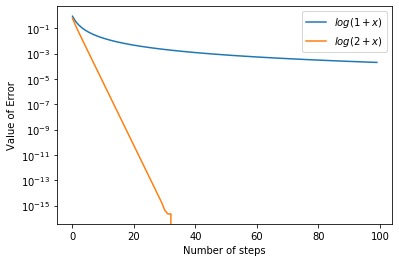

In [19]:
plt.semilogy()
plt.xlabel('Number of steps')
plt.ylabel('Value of Error')
#plt.yscale("log")
plt.plot(range(len(errors_func1)), errors_func1, label='$log(1 + x)$')
plt.plot(range(len(errors_func2)), errors_func2, label='$log(2 + x)$')

plt.legend()
plt.show()

What do you observe about the rates of convergence of the two methods? Can you explain this difference?

Repeat the experiment with different starting points. Try also with $x=sin(x)$, $x = sin(x+1)$, and $x = sin(x+2)$. How about other functions?